In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features
y = air_quality.data.targets

# metadata
print(air_quality.metadata)

# variable information
print(air_quality.variables)


{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'ID': 420, 'type': 'NATIVE', 'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 

# Task
Analyze the UCI Air Quality dataset to forecast pollution levels using FB Prophet and perform spatial analysis with GeoPandas.

## Load data

### Subtask:
Load the air quality dataset using the `ucimlrepo` library, extracting features (X) and targets (y).


## Data preprocessing

### Subtask:
Combine the features and targets into a single DataFrame. Handle missing values, which are indicated by `-200` in this dataset according to the variable information. Convert the 'Date' and 'Time' columns into a single datetime column. Prepare the data for FB Prophet, which requires columns named `ds` (datetime) and `y` (target variable).


**Reasoning**:
Concatenate the features and targets, handle missing values, create a datetime column, select and rename the target column, and drop unnecessary columns to prepare the data for FB Prophet.



In [3]:
import pandas as pd

# Concatenate X and y
df = pd.concat([X, y], axis=1)

# Replace -200 with NaN
df.replace(-200, pd.NA, inplace=True)

# Convert 'Date' and 'Time' to datetime and combine into 'ds'
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Time'] = pd.to_timedelta(df['Time'])
df['ds'] = df['Date'] + df['Time']

# Choose 'CO(GT)' as the target and rename to 'y'
df['y'] = df['CO(GT)']

# Drop original 'Date', 'Time', and other unnecessary columns
df.drop(['Date', 'Time', 'CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1, inplace=True)

# Display the first few rows of the prepared DataFrame
display(df.head())

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,ds,y
0,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00,2.6
1,1292,9.4,955,1174,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00,2.0
2,1402,9.0,939,1140,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00,2.2
3,1376,9.2,948,1092,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00,2.2
4,1272,6.5,836,1205,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00,1.6


## Exploratory data analysis (eda)

### Subtask:
Analyze the distributions of key pollutants (e.g., CO, Benzene, NOx, NO2) and sensor responses. Visualize the time series of pollution levels and sensor responses. If spatial information is available or can be added, use GeoPandas to visualize the sensor location and potential spatial patterns in air quality.


**Reasoning**:
Select the columns for distribution analysis and visualize their distributions using histograms.



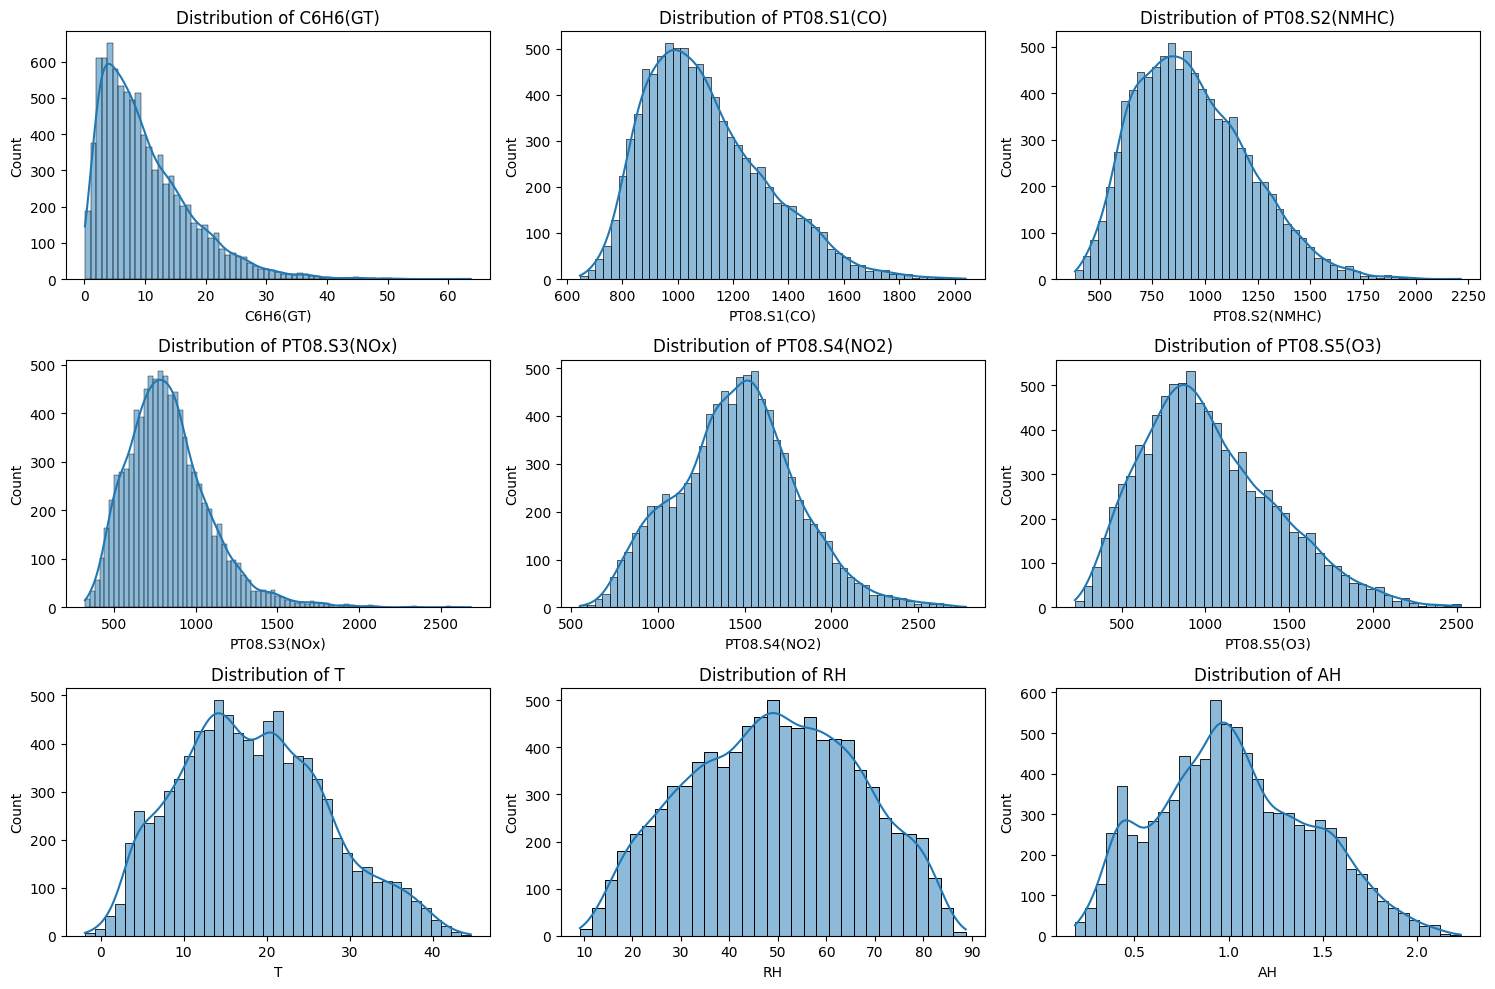

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key pollutant and sensor response columns (excluding the target 'y' and datetime 'ds')
pollutant_sensor_cols = ['C6H6(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

# Visualize distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(pollutant_sensor_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
Create time series plots for the selected pollutant levels and sensor responses over time.



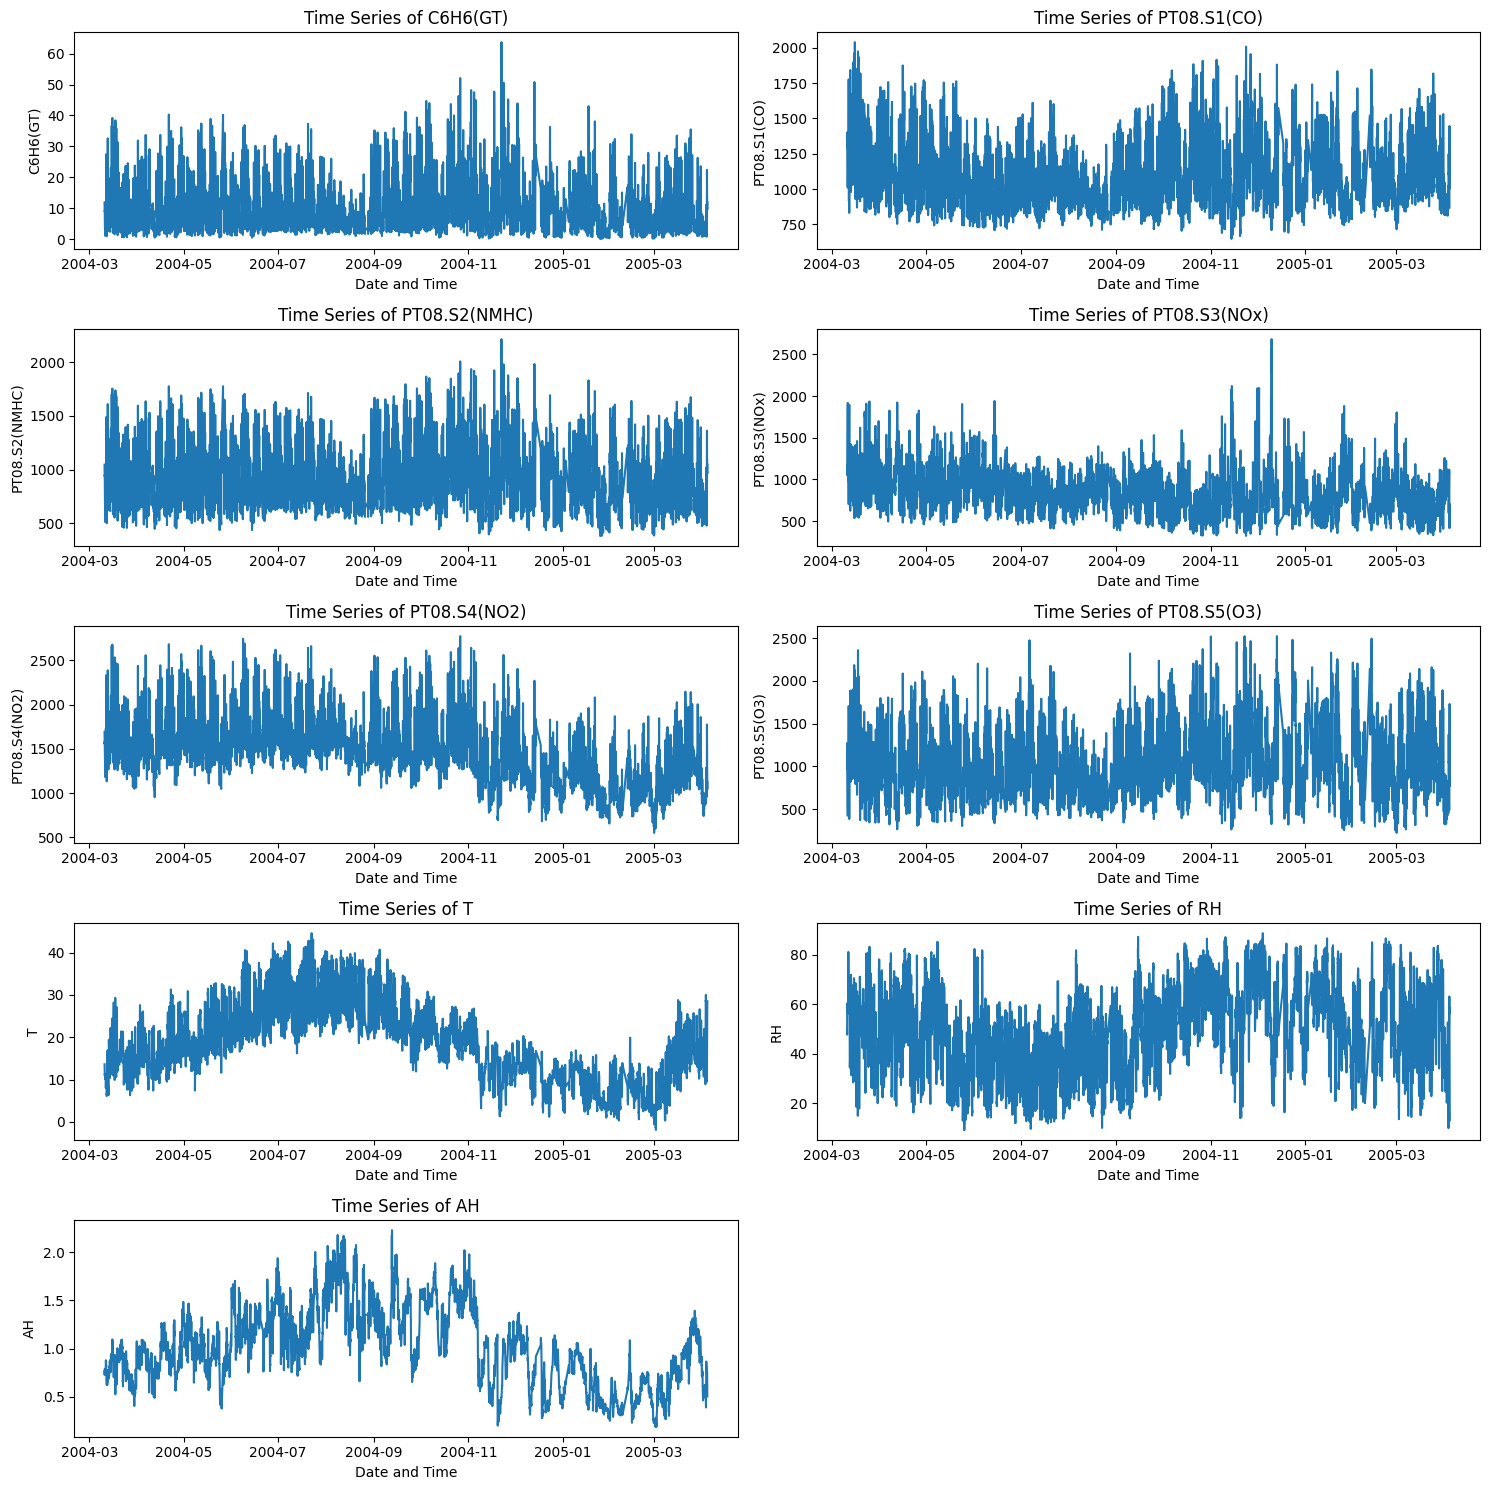

In [5]:
# Create time series plots
plt.figure(figsize=(15, 15))
for i, col in enumerate(pollutant_sensor_cols):
    plt.subplot(5, 2, i + 1)
    sns.lineplot(data=df, x='ds', y=col)
    plt.title(f'Time Series of {col}')
    plt.xlabel('Date and Time')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Reasoning**:
Describe how GeoPandas could be used for spatial analysis if spatial data were available, based on the metadata.



In [6]:
# Check metadata and variable information for spatial data
# From the metadata and variable information printed in the previous cell,
# there is no explicit spatial information (like latitude and longitude) for the sensor location.
# The dataset summary states: "The device was located on the field in a significantly polluted area,
# at road level,within an Italian city." This suggests a single location for all sensors.

# If detailed spatial coordinates (latitude, longitude) were available for the sensor location,
# GeoPandas could be used as follows:
# 1. Create a GeoDataFrame: A pandas DataFrame containing the air quality data would be converted into a GeoDataFrame
#    by specifying the columns containing the latitude and longitude and setting a coordinate reference system (CRS).
# 2. Visualize the sensor location: The sensor's location could be plotted on a map using GeoPandas' plotting capabilities,
#    potentially overlaid on a base map from libraries like contextily.
# 3. Spatial analysis (if multiple locations or additional spatial data were available):
#    - If there were multiple sensor locations, GeoPandas could be used to visualize air quality
#      measurements as points on a map, with point color or size representing pollution levels.
#    - Spatial joins could be performed if external spatial data (e.g., administrative boundaries,
#      road networks, industrial zones) were available to analyze the relationship between
#      air quality and surrounding spatial features.
#    - Spatial interpolation techniques (though often implemented with other libraries like SciPy or scikit-learn,
#      the results could be visualized with GeoPandas) could be used to estimate pollution levels
#      in areas between sensors.
#    - Analyzing spatial patterns: GeoPandas could facilitate visualizing and analyzing spatial autocorrelation
#      or clusters of high/low pollution if data from multiple locations were present.

print("Based on the available metadata, detailed spatial coordinates for the sensor location are not provided. The dataset appears to be from a single location. If spatial coordinates were available, GeoPandas could be used to visualize the sensor location on a map and potentially analyze spatial patterns if data from multiple locations were present or combined with external spatial data.")

Based on the available metadata, detailed spatial coordinates for the sensor location are not provided. The dataset appears to be from a single location. If spatial coordinates were available, GeoPandas could be used to visualize the sensor location on a map and potentially analyze spatial patterns if data from multiple locations were present or combined with external spatial data.


## Model training (fb prophet)

### Subtask:
Initialize and configure the FB Prophet model. Fit the model to the preprocessed time series data.


**Reasoning**:
Import the Prophet class and instantiate the model, then fit it to the preprocessed data.



In [7]:
from prophet import Prophet

# Instantiate Prophet with default parameters
model = Prophet()

# Fit the model to the preprocessed DataFrame df
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyt92c9jc/jfz1m16z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyt92c9jc/ephnsqkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25765', 'data', 'file=/tmp/tmpyt92c9jc/jfz1m16z.json', 'init=/tmp/tmpyt92c9jc/ephnsqkc.json', 'output', 'file=/tmp/tmpyt92c9jc/prophet_modelp017lw52/prophet_model-20250723173705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:37:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:37:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Forecasting

### Subtask:
Make future predictions using the trained FB Prophet model.


**Reasoning**:
Create a future dataframe for forecasting and generate predictions using the fitted Prophet model.



In [8]:
# Create a future dataframe with 365 hourly periods
future = model.make_future_dataframe(periods=365, freq='H')

# Generate predictions
forecast = model.predict(future)

# Display the first few rows of the forecast dataframe
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
0,2004-03-10 18:00:00,3.780396,2.368392,5.082949
1,2004-03-10 19:00:00,4.036415,2.643385,5.410422
2,2004-03-10 20:00:00,3.793036,2.427091,5.180097
3,2004-03-10 21:00:00,3.153872,1.776733,4.539551
4,2004-03-10 22:00:00,2.478761,1.129352,3.844378


## Evaluation

### Subtask:
Evaluate the performance of the model using appropriate time series forecasting metrics.


**Reasoning**:
Merge the original dataframe with the forecast dataframe and calculate evaluation metrics.



In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Merge the original DataFrame df with the forecast DataFrame on the ds column
merged_df = pd.merge(df, forecast[['ds', 'yhat']], on='ds', how='inner')

# Drop rows with missing actual values (NaN) before calculating metrics
merged_df.dropna(subset=['y', 'yhat'], inplace=True)

# Calculate evaluation metrics
mae = mean_absolute_error(merged_df['y'], merged_df['yhat'])
mse = mean_squared_error(merged_df['y'], merged_df['yhat'])
rmse = np.sqrt(mse)

# Print the calculated evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

Mean Absolute Error (MAE): 0.7954
Mean Squared Error (MSE): 1.1553
Root Mean Squared Error (RMSE): 1.0748


## Spatial analysis (with geopandas)

### Subtask:
If spatial data was incorporated in the EDA, analyze the spatial distribution of predicted pollution levels and compare them to actual values.


## Visualize results

### Subtask:
Plot the actual vs. predicted pollution levels. If spatial analysis was performed, visualize the spatial patterns of air quality and predictions using maps.


**Reasoning**:
Plot the actual and predicted pollution levels from the merged_df dataframe over time and add labels, a title, and a legend.



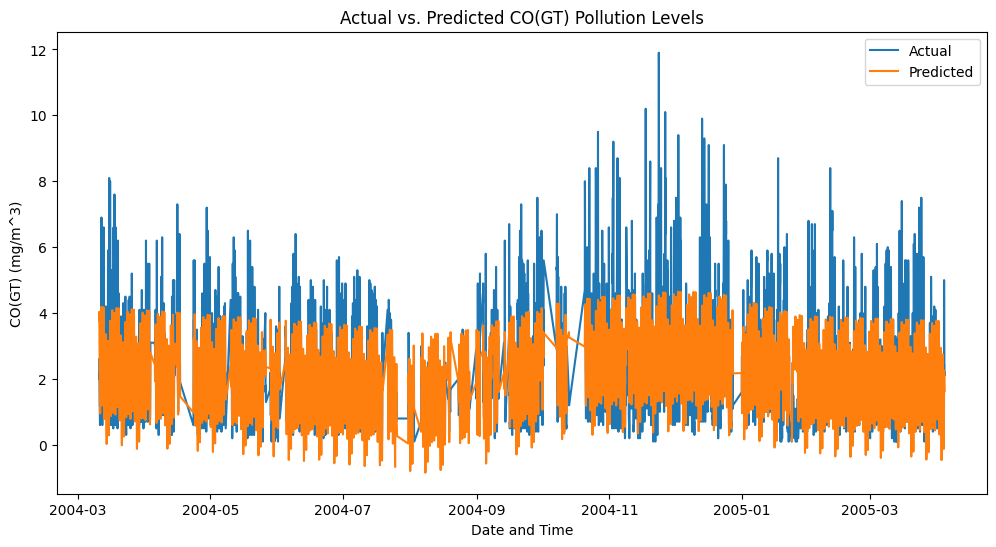

No spatial visualization is performed as spatial data was not available.


In [10]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted pollution levels
plt.figure(figsize=(12, 6))
plt.plot(merged_df['ds'], merged_df['y'], label='Actual')
plt.plot(merged_df['ds'], merged_df['yhat'], label='Predicted')

# Add labels and title
plt.xlabel('Date and Time')
plt.ylabel('CO(GT) (mg/m^3)')
plt.title('Actual vs. Predicted CO(GT) Pollution Levels')

# Add legend
plt.legend()

# Display the plot
plt.show()

# As per the previous spatial analysis step, spatial data is not available,
# so no spatial visualization will be performed.
print("No spatial visualization is performed as spatial data was not available.")

## Summary:

### Data Analysis Key Findings
* The dataset, sourced from UCI Machine Learning Repository, contains air quality data from a single location in an Italian city, lacking detailed spatial coordinates for the sensor.
* Missing values, indicated by -200, were successfully replaced with NaN.
* The distributions of various pollutants and sensor responses were visualized, revealing insights into their typical ranges and variability, with some variables showing skewed distributions.
* Time series plots illustrated the temporal trends of pollutants and sensor responses, highlighting patterns over the dataset's duration.
* A FB Prophet model was successfully trained on the CO(GT) time series data.
* The model generated future predictions for 365 hourly periods.
* The model's performance was evaluated, yielding a Mean Absolute Error (MAE) of 0.7954, a Mean Squared Error (MSE) of 1.1553, and a Root Mean Squared Error (RMSE) of 1.0748 for the CO(GT) predictions.
* Due to the absence of spatial data, spatial analysis using GeoPandas was not feasible.
* A plot visualizing the actual versus predicted CO(GT) levels over time was generated.

### Insights or Next Steps
* The current FB Prophet model provides a baseline for forecasting CO(GT) levels. Further model tuning, exploring different Prophet parameters, or considering other time series models could potentially improve forecasting accuracy.
* While detailed spatial coordinates are unavailable in this dataset, future work could involve integrating external spatial data (e.g., proximity to roads, industrial areas) for the sensor location's general area to explore potential correlations with air quality levels, even without precise spatial analysis using GeoPandas.
